<a href="https://colab.research.google.com/github/rafid29/Analysis-Bike-sharing/blob/main/Bike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data analysis : Bike sharing dataset**

Nama = A.A RAFID RAIHAN

EMAIL = rafidraihan2000@gmail.com

ID Dicoding =

**1. Project Introduction**

1. Background

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic,
environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.




**2. Define Business Question**

1. What is the trend of bicycle commuting by users in recent years?
2. How many total users do bicycle commuting in each season? sibling

Import library yang dibutuhkan

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Data Wrangling**

**Gathering Data**

load the data used

In this analysis the data used are one files, namely day.csv

In [120]:
Day_df = pd.read_csv("day.csv")

In [121]:
Day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# **Assesing Data**

Several techniques is perfomed to check the characteristics of the data, i.e check for duplicated values, check for missing values, check for inaccurate values, etc.

In [122]:
Day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


  It can be seen that in the Day_df dataset there are columns that have different data types than they should, such as :

  1. dteday we will convert to datetime data type form
  2. yr which should be date but because yr is defined with 0 for 2011 and 1 for 2012 we will convert it to the desired form
  3. column month, yr, and weekday will be replaced to the desired str form

See if there is empty data in the dataset

In [123]:
Day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

From the dataset there are no empty or null values

Check the descriptive values of each dataset

In [124]:
Day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


From this descriptive value it can be seen that;
1. max user casual is 3410
2. min user casual is 2
3. max user register is 6946
4. min user register is 20
5. max count total rental bikes from casual and register users is 8714
6. min count total rental bikes from casual and register users is 22



# **Cleaning Data**

convert type data

In [125]:
#convert dteday to datetime
datetime_columns = ["dteday"]
for column in datetime_columns:
  Day_df[column] = pd.to_datetime(Day_df[column])

In [126]:
Day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [127]:
#convert column weekday
Day_df['weekday'] = Day_df['dteday'].dt.day_name()
Day_df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [128]:
Day_df['mnth'] = Day_df['dteday'].dt.month_name()

In [129]:
Day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [130]:
def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in Day_df['season']:
    season = find_season(season)
    season_list.append(season)

Day_df['season'] = season_list

In [131]:
Day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,0,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,0,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,0,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,0,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [132]:
#correct the values yr
Day_df['yr']= Day_df['dteday'].dt.year

In [133]:
Day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,2011,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,2011,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [134]:
#corect values of temp, atemp, hum, and windspeed ke normal
Day_df['temp']=Day_df['temp']*41
Day_df['atemp']=Day_df['atemp']*50
Day_df['hum']=Day_df['hum']*100
Day_df['windspeed']=Day_df['windspeed']*67


In [135]:
Day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Winter,2011,January,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Winter,2011,January,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Winter,2011,January,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Winter,2011,January,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


save data that has been cleaned

In [161]:
Day_df.to_csv("clear_bikeshare_day.csv", index=False)

After cleaning the data, the next step is to explore the data

# **Explore Data Analysis (EDA)**

<ipython-input-137-2a4f2dc04ee8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Registered", "Casual"], y=[registered_sum, casual_sum],  palette=["red", "lightcoral"])


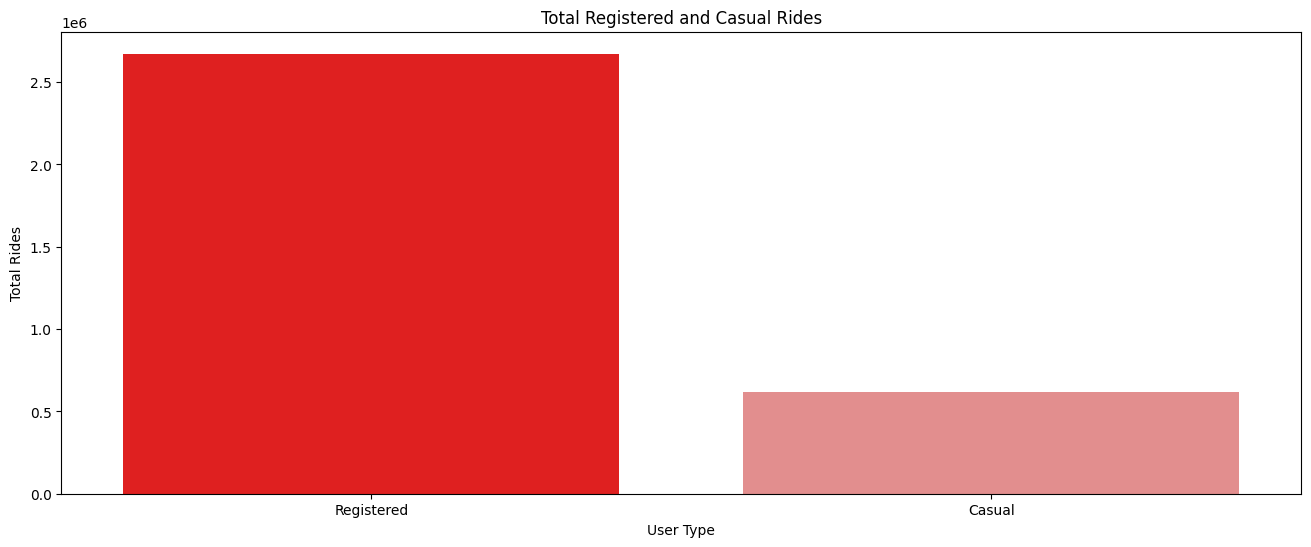

Count of registered users: 2672662
Count of casual users: 620017


In [137]:
registered_sum = Day_df['registered'].sum()
casual_sum = Day_df['casual'].sum()

plt.figure(figsize=(16,6))

# Create a bar chart using the plt.bar() function
sns.barplot(x=["Registered", "Casual"], y=[registered_sum, casual_sum],  palette=["red", "lightcoral"])

# Add labels and a title to the plot
plt.xlabel("User Type")
plt.ylabel("Total Rides")
plt.title("Total Registered and Casual Rides")

# Show the plot
plt.show()

print(f"Count of registered users: {registered_sum}")
print(f"Count of casual users: {casual_sum}")

register users are the highest users compared to casual users

User analysis based on bicycle commuting behavior at each time of day (year, month, season, weekday, holiday, workingday).

What is the user's pattern of bicycle rental?

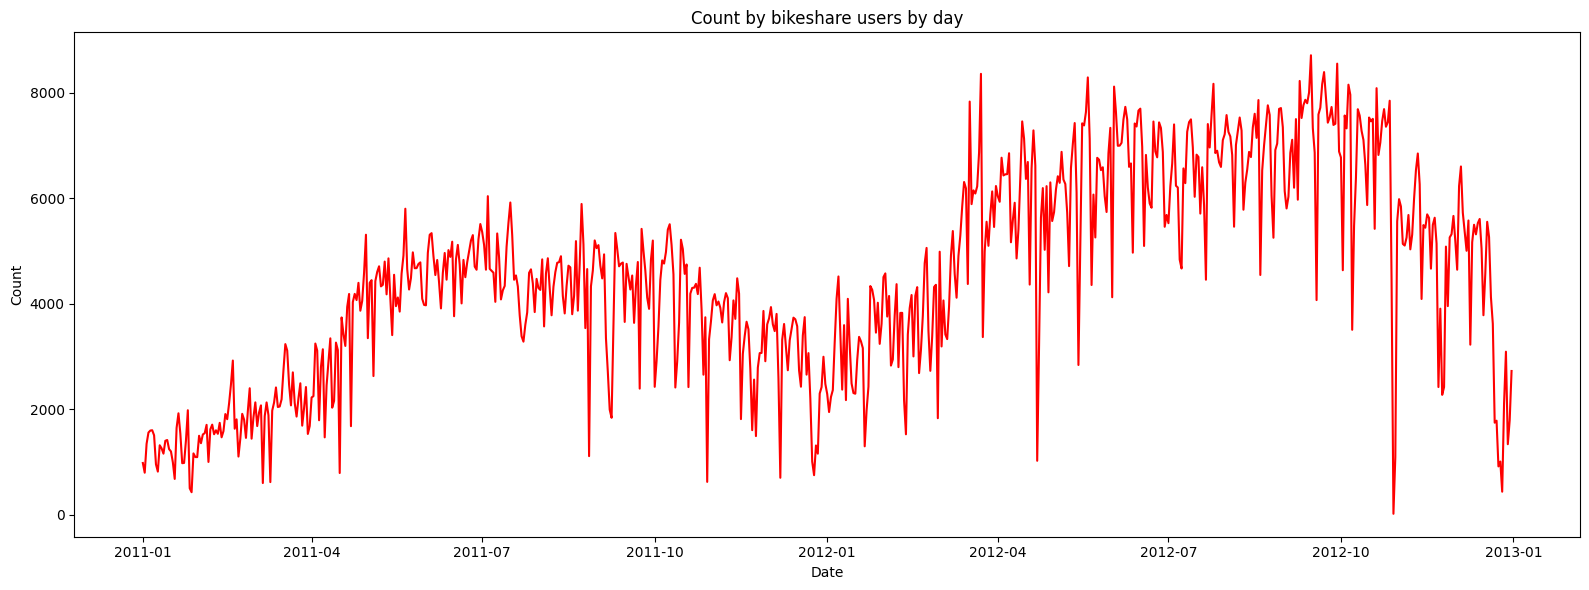

In [138]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="dteday", y="cnt", data=Day_df, color='red')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count by bikeshare users by day")

# Show the plot
plt.tight_layout()
plt.show()

The number of cyclists starts low at the beginning of each year and increases in the middle of the year, and at the end of the year the number of cyclists decreases.

bicyclists were higher in 2012 than in 2011.

count user per season

In [139]:
count_user_season= Day_df.groupby("season").cnt.sum().reset_index()
count_user_season.rename(columns={
    "cnt":"Jumlah_user_perseason"
}, inplace=True)
count_user_season

,season,Jumlah_user_perseason
0,Fall,841613
1,Spring,918589
2,Summer,1061129
3,Winter,471348


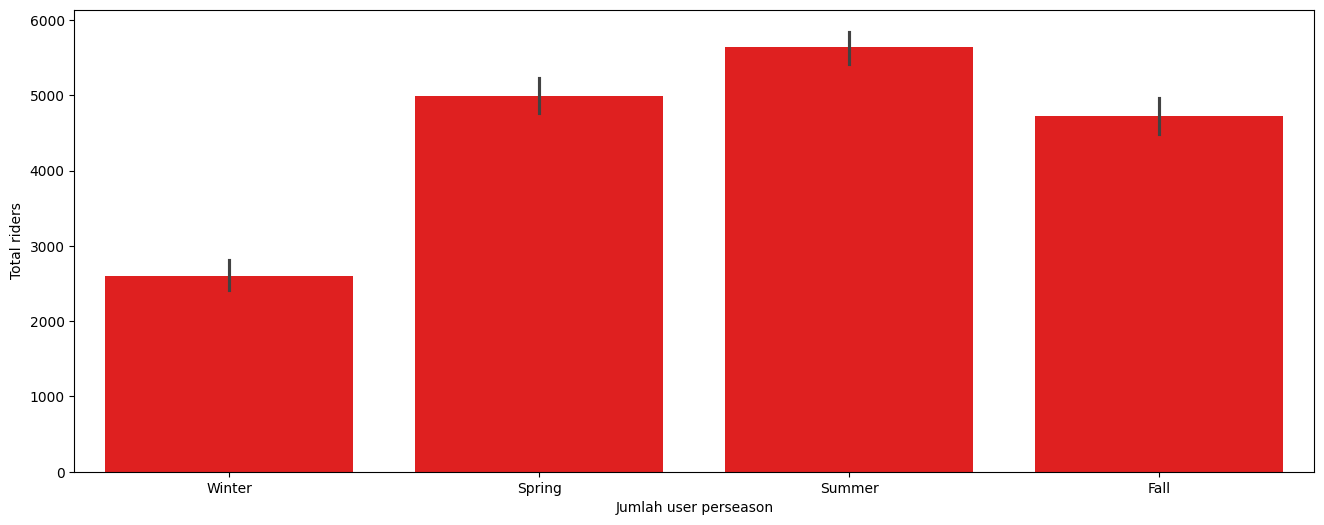

count of user per seaon:    season  Jumlah_user_perseason
0    Fall                 841613
1  Spring                 918589
2  Summer                1061129
3  Winter                 471348


In [140]:
#create a bar chart

plt.figure(figsize=(16,6))
sns.barplot(x="season", y="cnt", data=Day_df, color="red")

plt.xlabel("Jumlah user perseason")
plt.ylabel("Total riders")
plt.show()

print(f"count of user per seaon: {count_user_season}")

The number of cyclists increases in summer and decreases in winter.

count user per month

In [141]:
Count_user_register_df = Day_df.groupby("mnth").cnt.sum().reset_index()

Count_user_register_df.rename(columns={
    "dteday":"Bulan",
    "cnt":"Jumlah_user_register"
}, inplace=True)
Count_user_register_df

,mnth,Jumlah_user_register
0,April,269094
1,August,351194
2,December,211036
3,February,151352
4,January,134933
5,July,344948
6,June,346342
7,March,228920
8,May,331686
9,November,254831


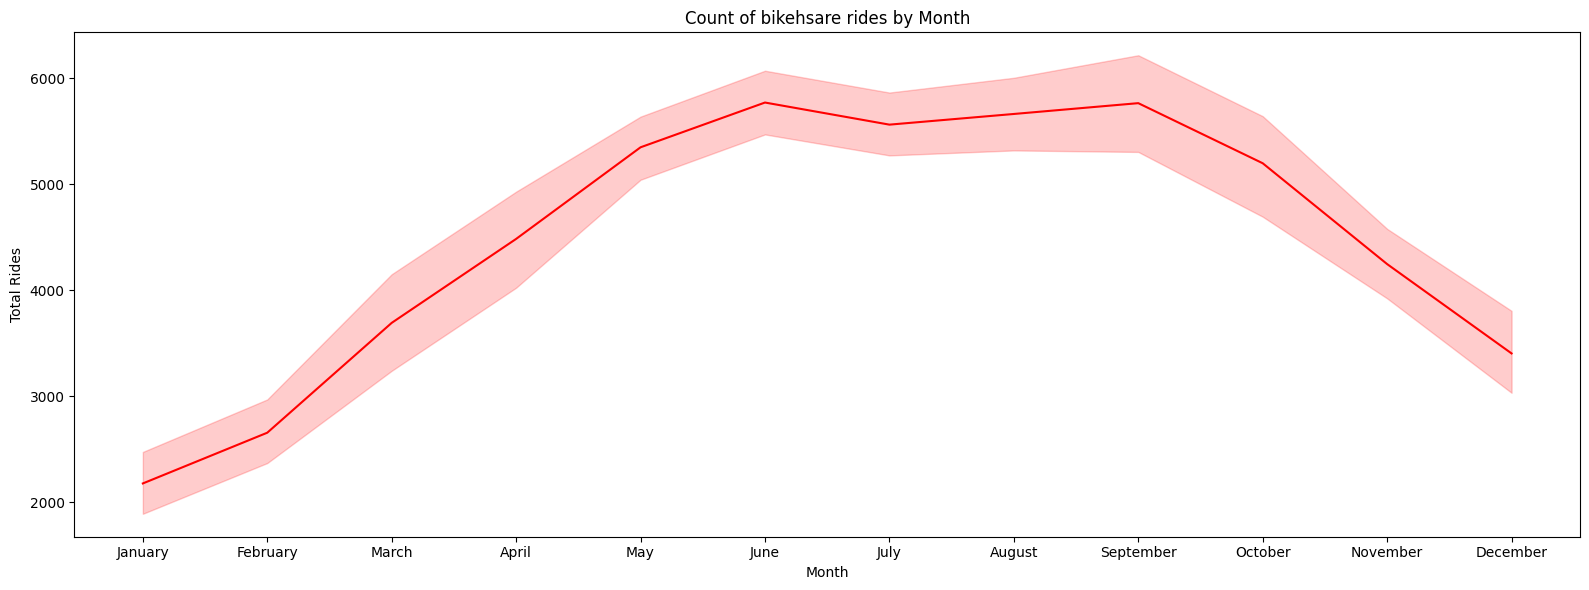

In [142]:
plt.figure(figsize=(16,6))

# Create a barplot using the sns.boxplot() function
sns.lineplot(
    x="mnth",
    y="cnt",
    data=Day_df,
    color="red"
)

# Add labels and a title to the plot
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Count of bikehsare rides by Month")

# Show the plot
plt.tight_layout()
plt.show()

ridership is low at the beginning of the year, increases in the middle of the year, and decreases at the end of the year as the seasons change.

count user per year

<ipython-input-143-560358e10368>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


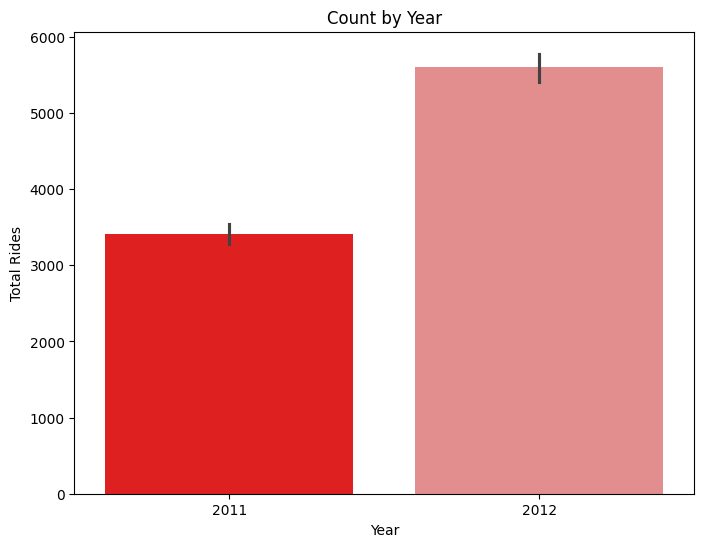

In [143]:
plt.figure(figsize=(8,6))

# Create a boxplot using the sns.boxplot() function
sns.barplot(
    x="yr",
    y="cnt",
    data=Day_df,
    palette=["red", "lightcoral"]
)

# Add labels and a title to the plot
plt.xlabel("Year")
plt.ylabel("Total Rides")
plt.title("Count by Year")

# Show the plot
plt.show()

the highest number of cyclists in 2012

count user per day

In [144]:
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

<ipython-input-145-07fc8230f3f0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-145-07fc8230f3f0>:4: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


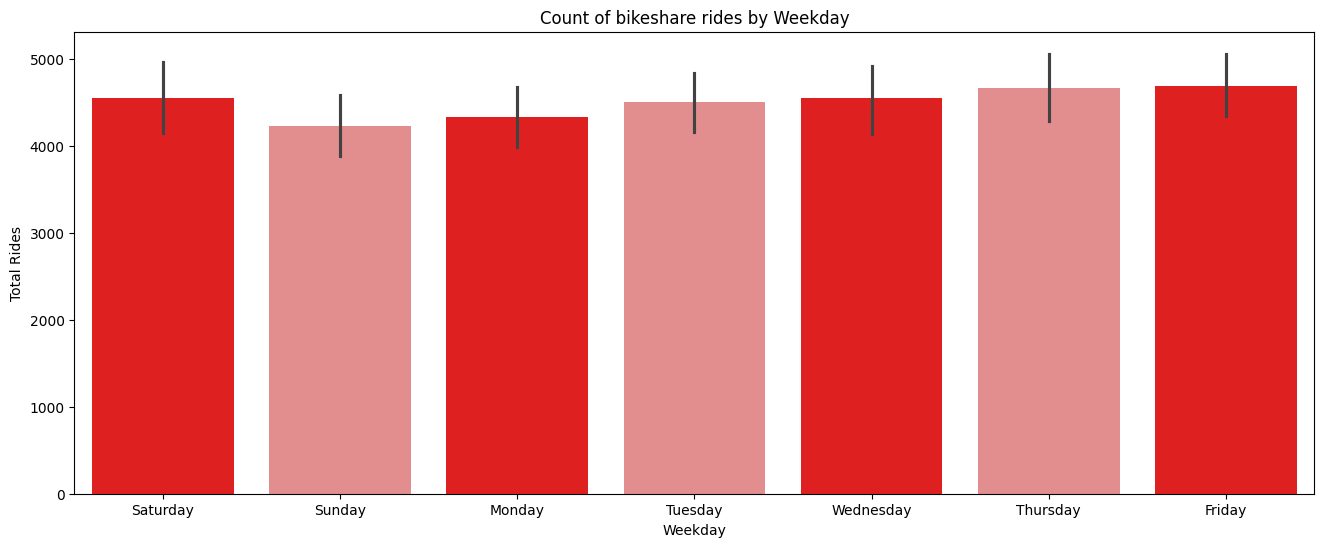

Saturday     105
Sunday       105
Monday       105
Tuesday      104
Wednesday    104
Thursday     104
Friday       104
Name: weekday, dtype: int64


In [145]:
plt.figure(figsize=(16,6))


sns.barplot(
    x="weekday",
    y="cnt",
    data=Day_df,
    palette=["red", "lightcoral"],
    #order=day
)

# Add labels and a title to the plot
plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Weekday")

# Show the plot
plt.show()
print(Day_df['weekday'].value_counts())

the number of cyclists is the same every day, but on Saturdays and Sundays it is slightly different from other days.

count user by holiday

<ipython-input-146-3c6d1ec13bdc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


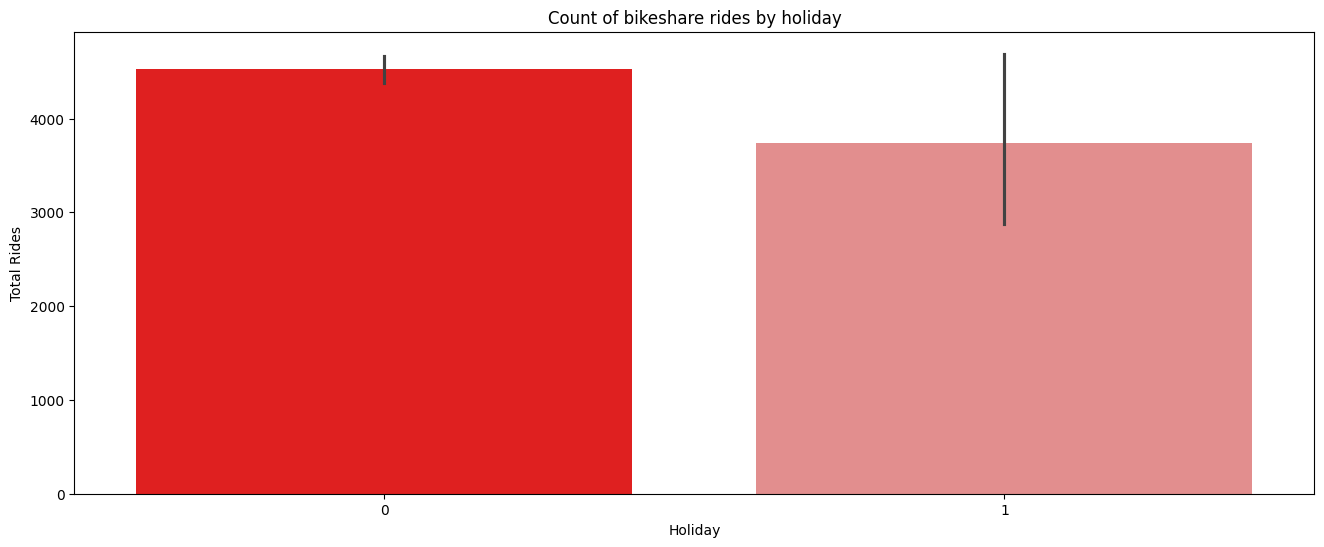

In [146]:
plt.figure(figsize=(16,6))

# Create a boxplot using the sns.boxplot() function
sns.barplot(
    x="holiday",
    y="cnt",
    data=Day_df,
    palette=["red", "lightcoral"]
)

# Add labels and a title to the plot
plt.xlabel("Holiday")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by holiday")

# Show the plot
plt.show()

the highest number of cyclists occurred on holiday

count user by workingday

<ipython-input-147-0e496188c32d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


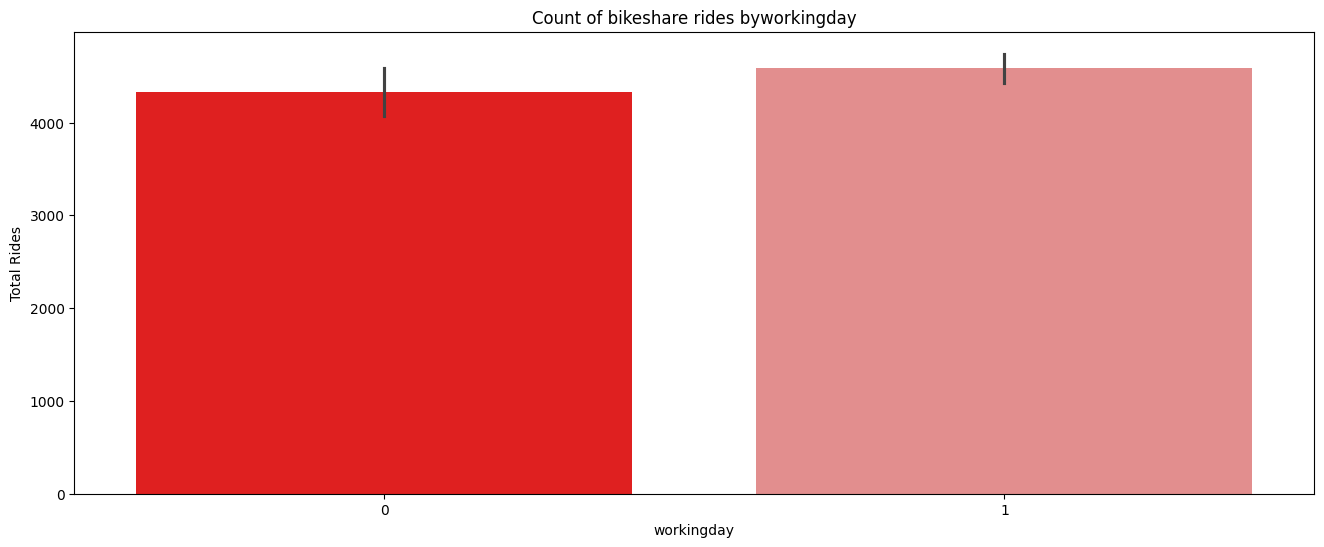

Count of bikeshare users based on working day:
1    500
0    231
Name: workingday, dtype: int64


In [147]:
plt.figure(figsize=(16,6))

# Create a boxplot using the sns.boxplot() function
sns.barplot(
    x="workingday",
    y="cnt",
    data=Day_df,
    palette=["red", "lightcoral"]
)

# Add labels and a title to the plot
plt.xlabel("workingday")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides byworkingday")

# Show the plot
plt.show()
print('Count of bikeshare users based on working day:')
print(Day_df['workingday'].value_counts())

user analysis based on weather histrogram

In [148]:
#korelasi cuaca dengan user
Day_df.corr(numeric_only=True)

,instant,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866025,0.016145,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
yr,0.866025,1.000000,0.007954,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
holiday,0.016145,0.007954,1.000000,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
workingday,-0.004337,-0.002013,-0.253023,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.048727,-0.034627,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.047604,-0.028556,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.046106,-0.032507,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.016375,-0.110651,-0.015937,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.112620,-0.011817,0.006292,-0.018796,0.039511,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.275255,0.248546,0.054274,-0.518044,-0.247353,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804


<Axes: >

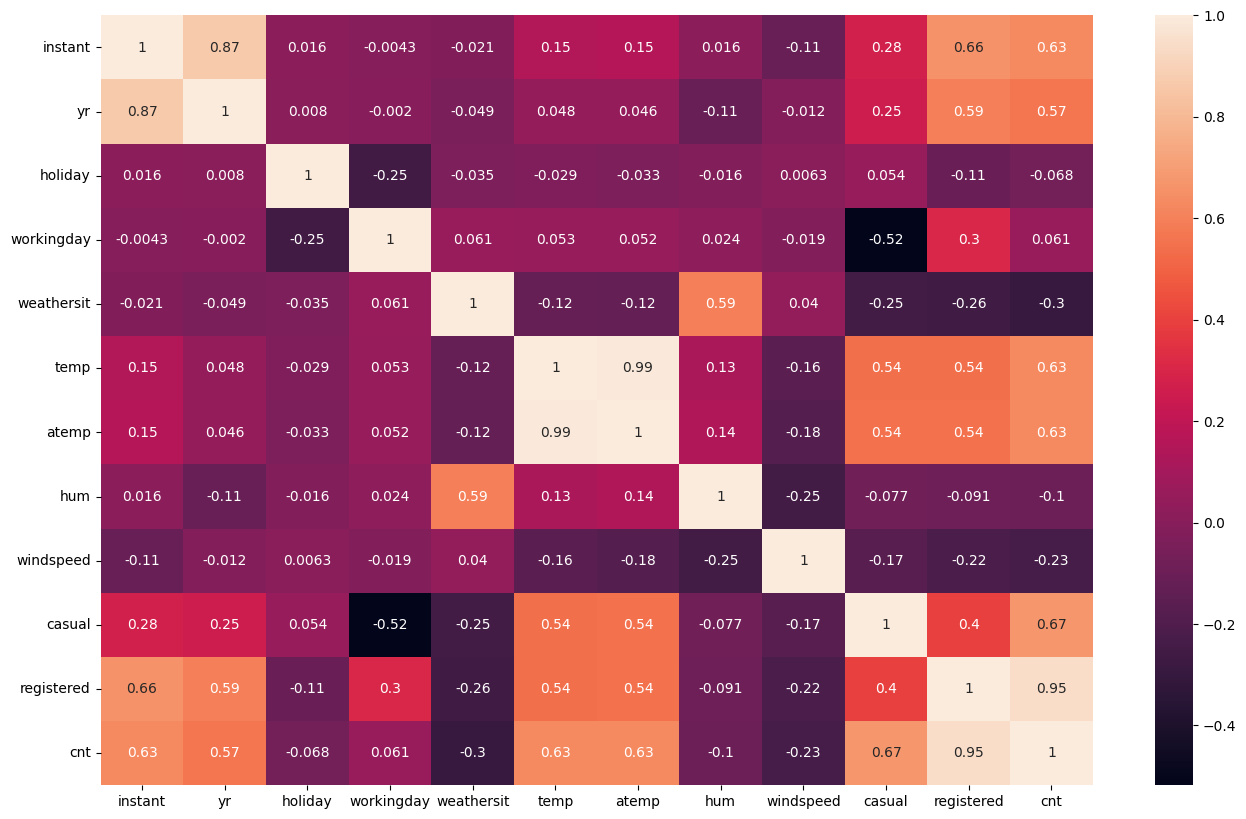

In [149]:
plt.figure(figsize=(16, 10))
sns.heatmap(Day_df.corr(numeric_only=True), annot=True)

The strongest correlation occurs between the number of registers, and casual vs cnt.


on this page, we will answer the question we defined earlier

1. What is the trend of bicycle commuting by users in recent years?
2. How many total users do bicycle commuting in each season?

What is the trend of bicycle commuting by users in recent years?

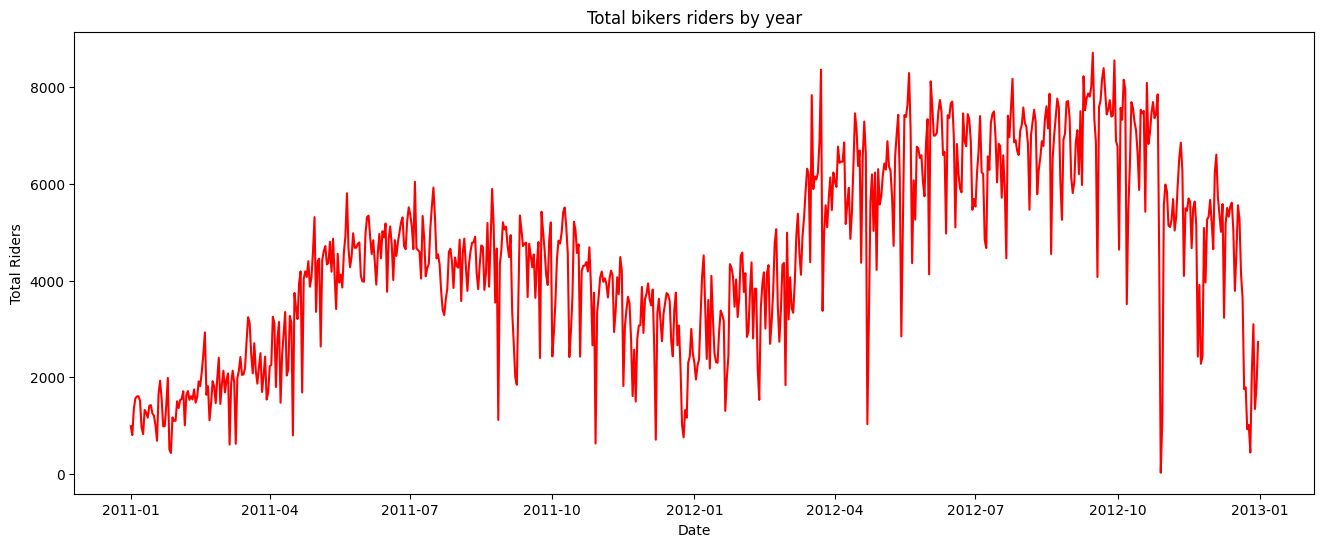

In [150]:
plt.figure(figsize=(16,6))
sns.lineplot (x="dteday", y="cnt", data=Day_df, color="red")

plt.xlabel("Date")
plt.ylabel("Total Riders")
plt.title("Total bikers riders by year")
plt.show()

chart ini bisa kita breakdown lagi untuk user berdasarkan casual dan reigstered

In [151]:
user_month = Day_df.resample(rule="M", on="dteday").agg({
    "casual":"sum",
    "registered":"sum",
    "cnt":"sum"
})
user_month.index=user_month.index.strftime("%b-%y")
user_month=user_month.reset_index()
user_month=user_month.rename(columns={'dteday':'year-month'})
user_month

,year-month,casual,registered,cnt
0,Jan-11,3073,35116,38189
1,Feb-11,6242,41973,48215
2,Mar-11,12826,51219,64045
3,Apr-11,22346,72524,94870
4,May-11,31050,104771,135821
5,Jun-11,30612,112900,143512
6,Jul-11,36452,104889,141341
7,Aug-11,28842,107849,136691
8,Sep-11,26545,100873,127418
9,Oct-11,25222,98289,123511


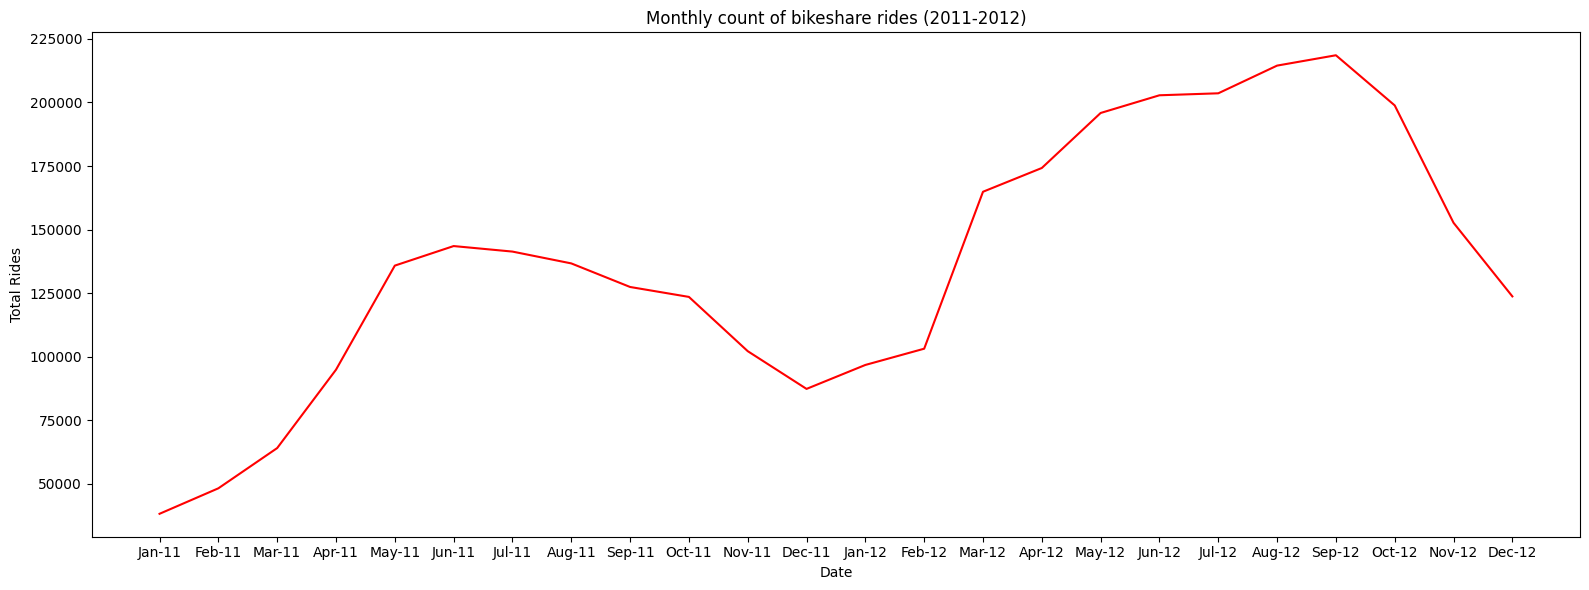

In [152]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="year-month", y="cnt", data=user_month, color='red')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of bikeshare rides (2011-2012)")

# Show the plot
plt.tight_layout()
plt.show()

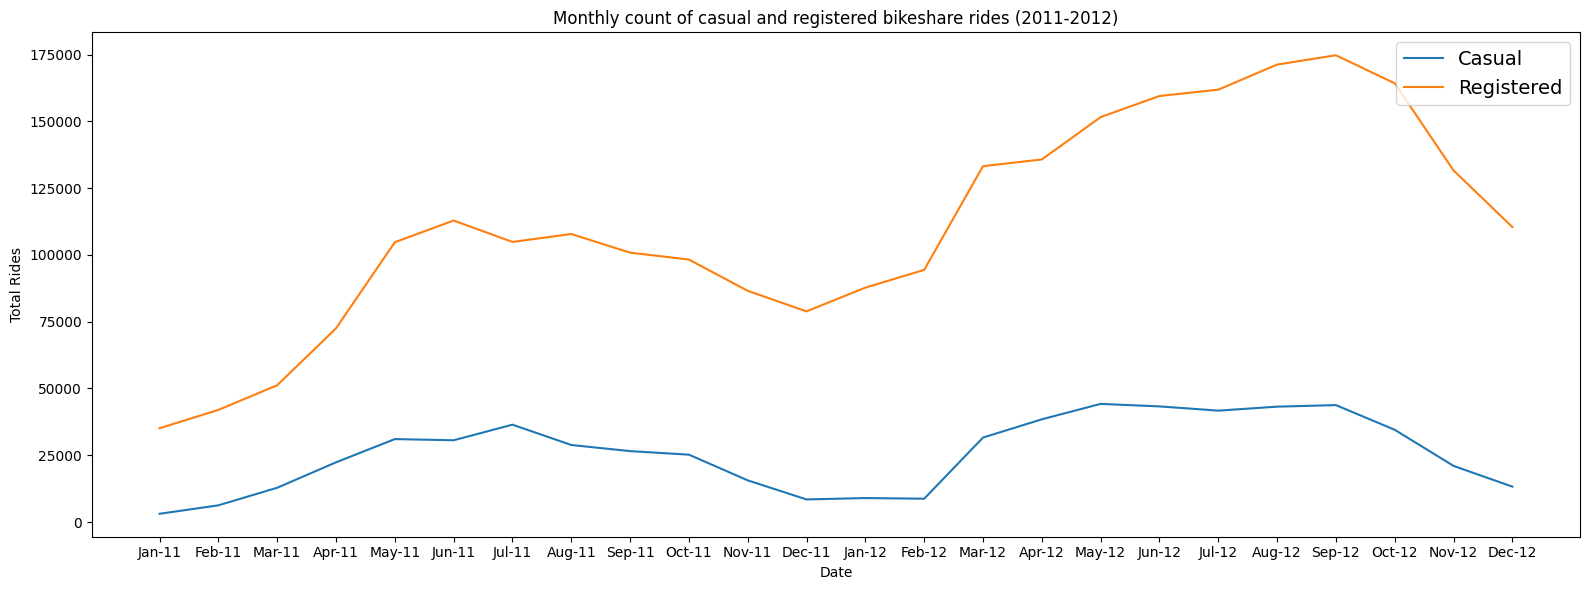

In [153]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="year-month", y="casual", data=user_month, label='Casual')
sns.lineplot(x="year-month", y="registered", data=user_month, label='Registered')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of casual and registered bikeshare rides (2011-2012)")

# Add a legend to the plot
plt.legend(loc='upper right', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

**insight**
1. the number of registered cyclists is more than casual cyclists

2. from the beginning of 2011 to the end of 2012, the number of cyclists shows an upward trend, although at the beginning and end of the year it will have a downward trend.

3. the highest number of cyclists occurred in 2012 compared to 2011.




Berapa total user yang melakukan perentalan sepeda di setiap season?

In [154]:
seasonly_users_df = Day_df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
seasonly_users_df = seasonly_users_df.reset_index()
seasonly_users_df.head()

,season,casual,registered,cnt
0,Fall,129782,711831,841613
1,Spring,203522,715067,918589
2,Summer,226091,835038,1061129
3,Winter,60622,410726,471348


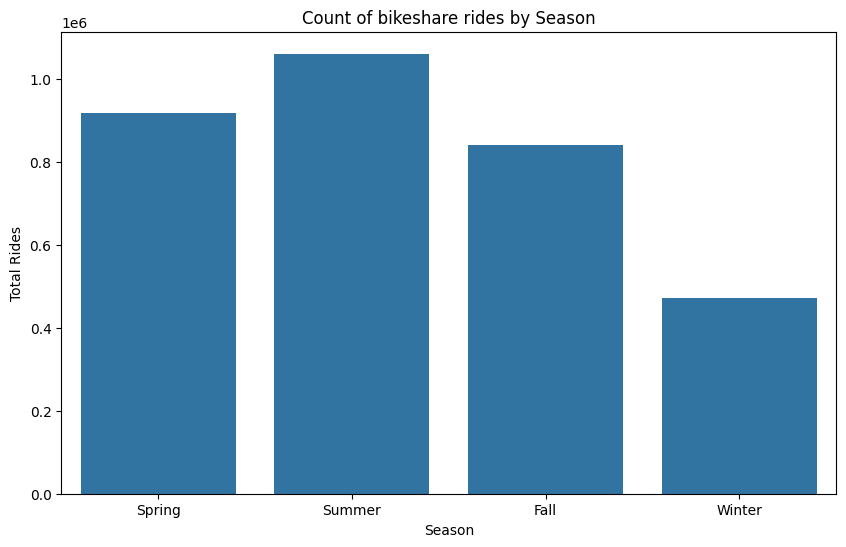

In [155]:
plt.figure(figsize=(10,6))
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
sns.barplot(x="season", y="cnt", data=seasonly_users_df, order=season_order)

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

plt.show()

In [159]:
season_pivot = pd.melt(seasonly_users_df,
                       id_vars=['season'],
                       value_vars=['casual','registered'],
                       var_name='status',
                       value_name='count')
season_pivot

,season,status,count
0,Fall,casual,129782
1,Spring,casual,203522
2,Summer,casual,226091
3,Winter,casual,60622
4,Fall,registered,711831
5,Spring,registered,715067
6,Summer,registered,835038
7,Winter,registered,410726


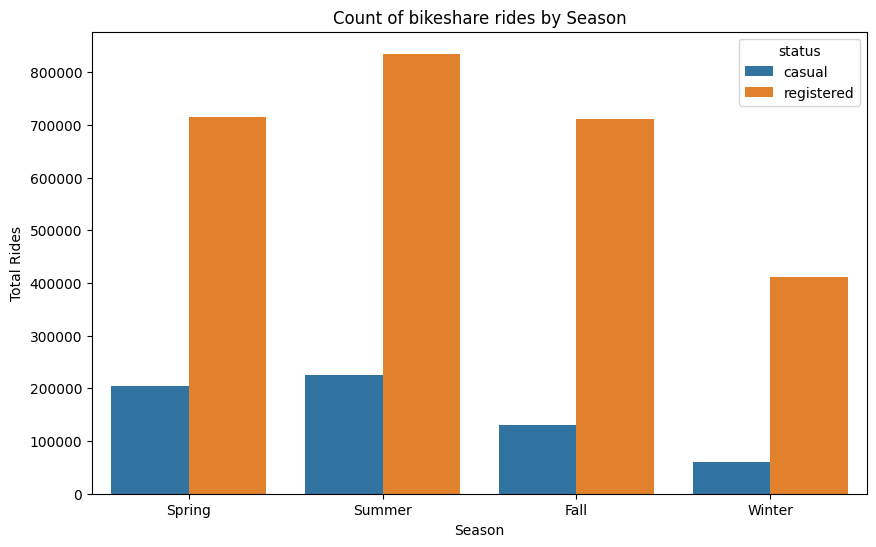

In [160]:
plt.figure(figsize=(10,6))

sns.barplot(x='season', y='count', data=season_pivot, order=season_order, hue='status')

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

plt.show()

**insight**

1. the number of cyclists is highest in summer and lowest in winter.

2. registered cyclists traveled the most in the summer season, and if we look at the winter season the number of cyclists who traveled was also registered cyclists compared to casual cyclists.

# **Conclusion**

1. What is the trend of bicycle commuting by users in recent years?


The trend in bicycle users is that bicycle users have increased in some years, although at the beginning and end of the year there is also a downward trend.

2. How many total users do bicycle commuting in each season?

The number of cyclists is highest in summer and lowest in winter, with register cyclists outnumbering casual cyclists.

In [166]:
def create_user_season(df):
    user_season = df.groupby("season").agg({
        "casual" : "sum",
        "registered" : "sum",
        "cnt" : "sum"
    })
    user_season = user_season.reset_index()
    user_season.rename(columns={
        "cnt" : "Total_Riders"
    }, inplace=True)
    user_season = pd.melt(user_season,
                                      id_vars=['season'],
                                      value_vars=['casual', 'registered'],
                                      var_name='type_of_rides',
                                      value_name='count_rides')

    user_season['season'] = pd.Categorical(user_season['season'],
                                             categories=['Spring', 'Summer', 'Fall', 'Winter'])

    user_season = user_season.sort_values('season')

    return user_season
create_user_season


<function __main__.create_user_season(df)>